# The Adult Income dataset

Description
Title of dataset: adult.csv

Sources:

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

Number of Instances

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

* 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

Missing Values:

 7% rows have missing values.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [49]:
#finding missing values and replacing them

missing_val=['n/a','-','?']

df=pd.read_csv('adult.csv',na_values=missing_val)

In [19]:
#top 5 rows

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [20]:
#bottom 5 rows

df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [21]:
#basic info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#no. of rows and columns in dataset

df.shape

(48842, 15)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
#statistical description of dataset

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#statistical description of dataset is given above

In [9]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

people with income<=50k are 371155
 and people with income>=50k are 11687

In [12]:
#missing values in dataset in various columns

df.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

workclass ,occupation and native country have missing values in them

In [22]:
df.drop("fnlwgt",axis=1,inplace=True)

 fnlwgt column is removed from the dataset

In [23]:
# % of missing values

df.isna().mean().round(4) * 100

age                0.00
workclass          5.73
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [24]:
df.dropna(axis=0,how='any')

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


removed rows containing missing values

# univariate analysis

Text(0.5, 0.98, 'Age')

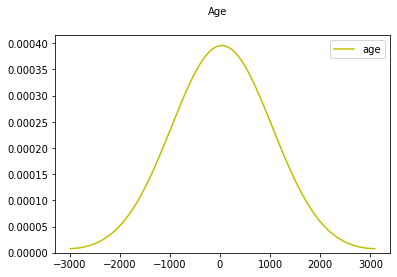

In [81]:
# pdf -> age

diagram=sns.kdeplot(df['age'],bw=1000,color='y')

diagram.figure.suptitle("Age", fontsize = 10)

Text(0.5, 0.98, 'Educational Number')

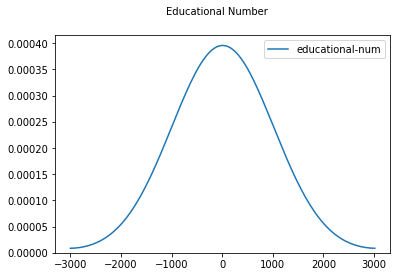

In [82]:
# pdf -> educational-num

diagram=sns.kdeplot(df['educational-num'],bw=1000)

diagram.figure.suptitle("Educational Number", fontsize = 10)

Text(0.5, 0.98, 'Capital Gain')

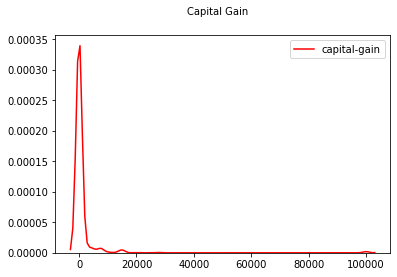

In [83]:
# pdf -> capital-gain

diagram=sns.kdeplot(df['capital-gain'],bw=1000,color='r')

diagram.figure.suptitle("Capital Gain", fontsize = 10)

Text(0.5, 0.98, 'Capital Loss')

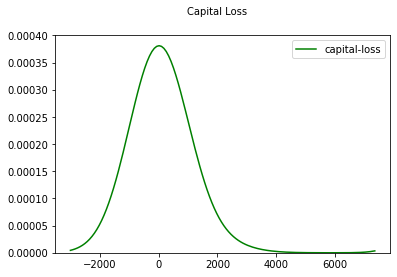

In [84]:
# pdf -> capital-loss

diagram=sns.kdeplot(df['capital-loss'],bw=1000,color='g')

diagram.figure.suptitle("Capital Loss", fontsize = 10)

Text(0.5, 0.98, 'Capital Loss')

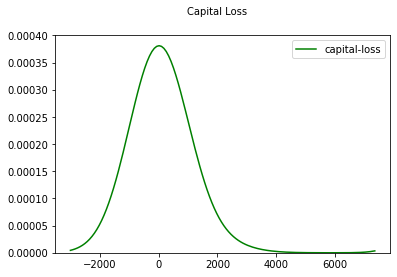

In [85]:
# pdf -> capital-loss

diagram=sns.kdeplot(df['capital-loss'],bw=1000,color='g')

diagram.figure.suptitle("Capital Loss", fontsize = 10)

Text(0.5, 0.98, 'Age')

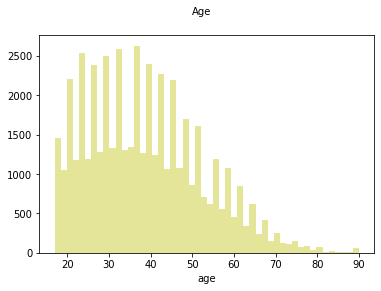

In [86]:
# histogram -> age

diagram=sns.distplot(df['age'],hist=True,kde=False,color='y')

diagram.figure.suptitle("Age", fontsize = 10)

Text(0.5, 0.98, 'Educational Number')

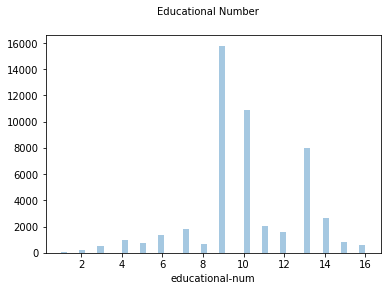

In [87]:
# histogram -> educational-num

diagram=sns.distplot(df['educational-num'],hist=True,kde=False)
diagram.figure.suptitle("Educational Number", fontsize = 10)

Text(0.5, 0.98, 'Capital Gain')

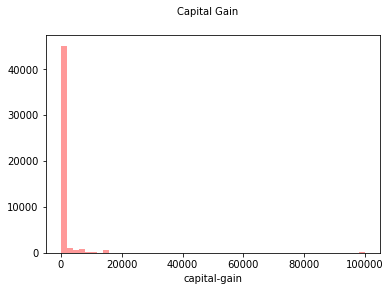

In [88]:
# histogram -> capital-gain

diagram=sns.distplot(df['capital-gain'],hist=True,kde=False,color='r')

diagram.figure.suptitle("Capital Gain", fontsize = 10)

Text(0.5, 0.98, 'Capital Loss')

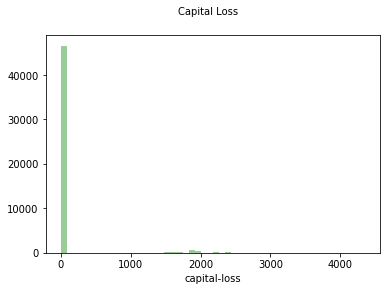

In [89]:
# histogram -> capital-loss

diagram=sns.distplot(df['capital-loss'],hist=True,kde=False,color='g')

diagram.figure.suptitle("Capital Loss", fontsize = 10)

Text(0.5, 0.98, 'Hours per Week')

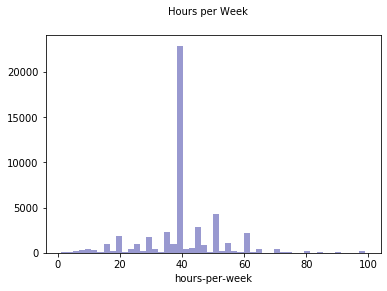

In [64]:
# histogram -> hours-per-week

diagram=sns.distplot(df['hours-per-week'],hist=True,kde=False,color='darkblue')

diagram.figure.suptitle("Hours per Week", fontsize = 10)

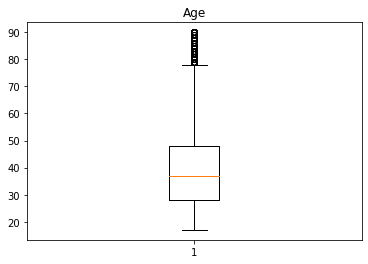

In [35]:
# Boxplot -> Age

plt.title('Age')

plt.boxplot(df['age'])

plt.show()

many outliers are there

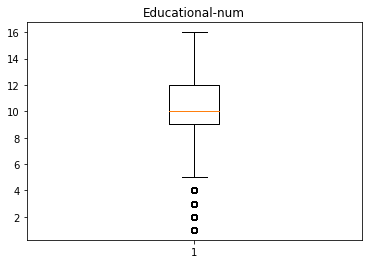

In [36]:
# Boxplot -> educational-num

plt.title('Educational-num')

plt.boxplot(df['educational-num'])

plt.show()

4 outliers are there 

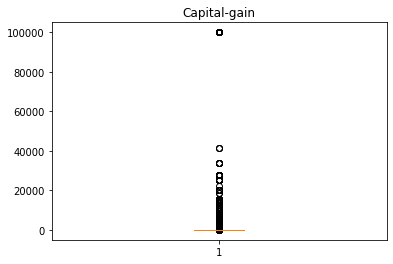

In [37]:
# Boxplot -> capital-gain

plt.title('Capital-gain')

plt.boxplot(df['capital-gain'])

plt.show()

many outliers are present

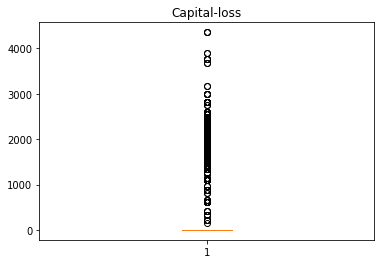

In [38]:
# Boxplot of capital-loss

plt.title('Capital-loss')

plt.boxplot(df['capital-loss'])

plt.show()

many outliers are there

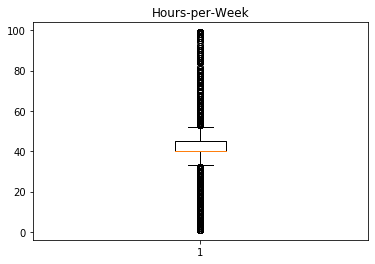

In [39]:
# Boxplot of hours-per-week

plt.title('Hours-per-Week')

plt.boxplot(df['hours-per-week'])

plt.show()

outliers are present at starting and ending values

# bivariate analysis


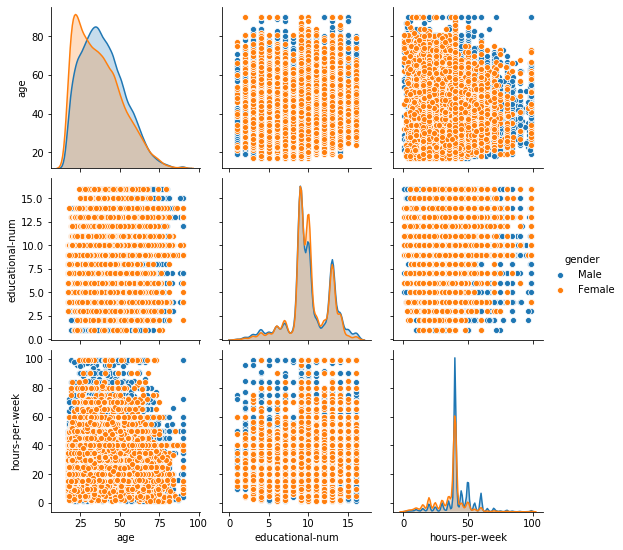

In [40]:
sns.pairplot(df, vars=['age', 'educational-num', 'hours-per-week'],hue='gender')

female are more in number 
and 
male are working more


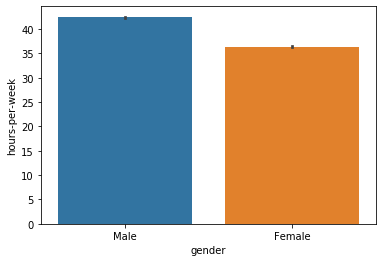

In [41]:
sns.barplot(data=df, x='gender', y='hours-per-week')

Text(0, 0.5, 'Proportion of population')

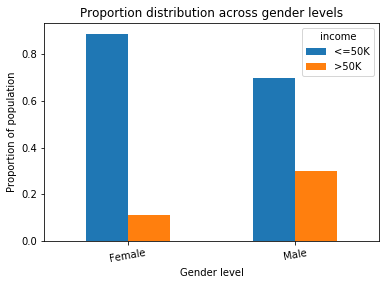

In [93]:
g = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0),2)

g.sort_values(by = '>50K', inplace = True)

x = gender.plot(kind ='bar', rot=10, title = 'Proportion distribution across gender levels')

x.set_xlabel('Gender level')

x.set_ylabel('Proportion of population')

males are earning more as shown in the graph 

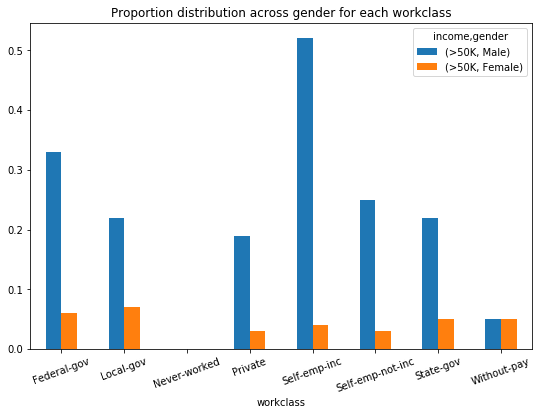

In [92]:
g_workclass = round(pd.crosstab(df.workclass, [df.income, df.gender]).div(pd.crosstab(df.workclass, [df.income, df.gender]).apply(sum,1),0),2)
g_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (9,6), rot=20)

males are earninng more 

no people that has never worked

females are less in numbers than males

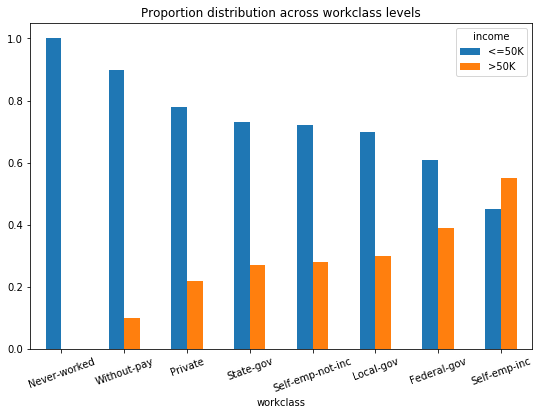

In [91]:
workclass = round(pd.crosstab(df.workclass, df.income).div(pd.crosstab(df.workclass, df.income).apply(sum,1),0),2)

workclass.sort_values(by = '>50K', inplace = True)

x = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (9,6), rot=20)

more are with income >= 50k in workclass except self-emp-inc

Text(0, 0.5, 'Proportion of population')

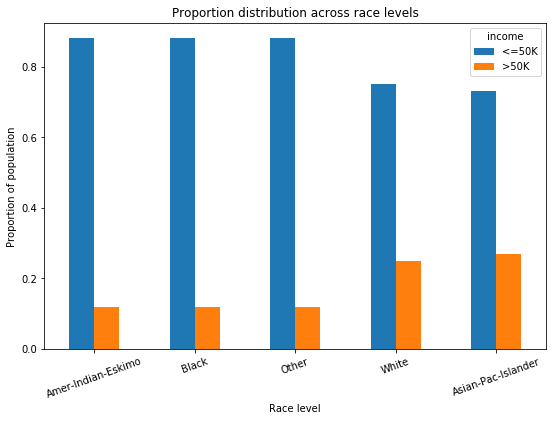

In [90]:
race = round(pd.crosstab(df.race, df.income).div(pd.crosstab(df.race, df.income).apply(sum,1),0),2)

race.sort_values(by = '>50K', inplace = True)

x = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (9,6), rot=20)

x.set_xlabel('Race level')

x.set_ylabel('Proportion of population')

a good proportion of people are earning <= 50k across race levels

Text(0, 0.5, 'Proportion of population')

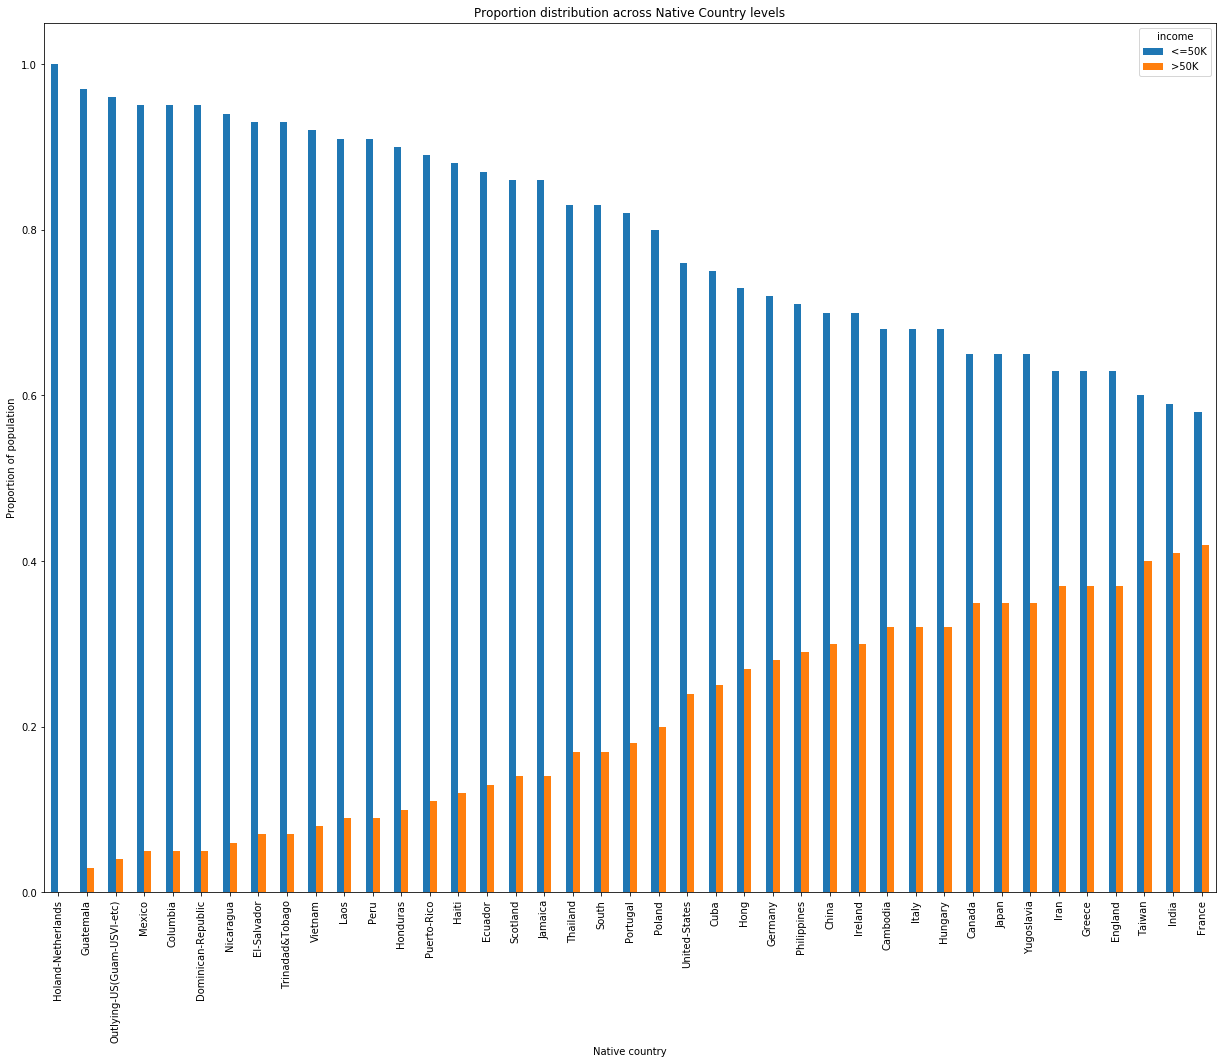

In [78]:
native_country = round(pd.crosstab(df['native-country'], df.income).div(pd.crosstab(df['native-country'], df.income).apply(sum,1),0),2)

native_country.sort_values(by = '>50K', inplace = True)

x = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (21,16))

x.set_xlabel('Native country')

x.set_ylabel('Proportion of population')

more population in any countries are having income <= 50k

Text(0, 0.5, 'Proportion of population')

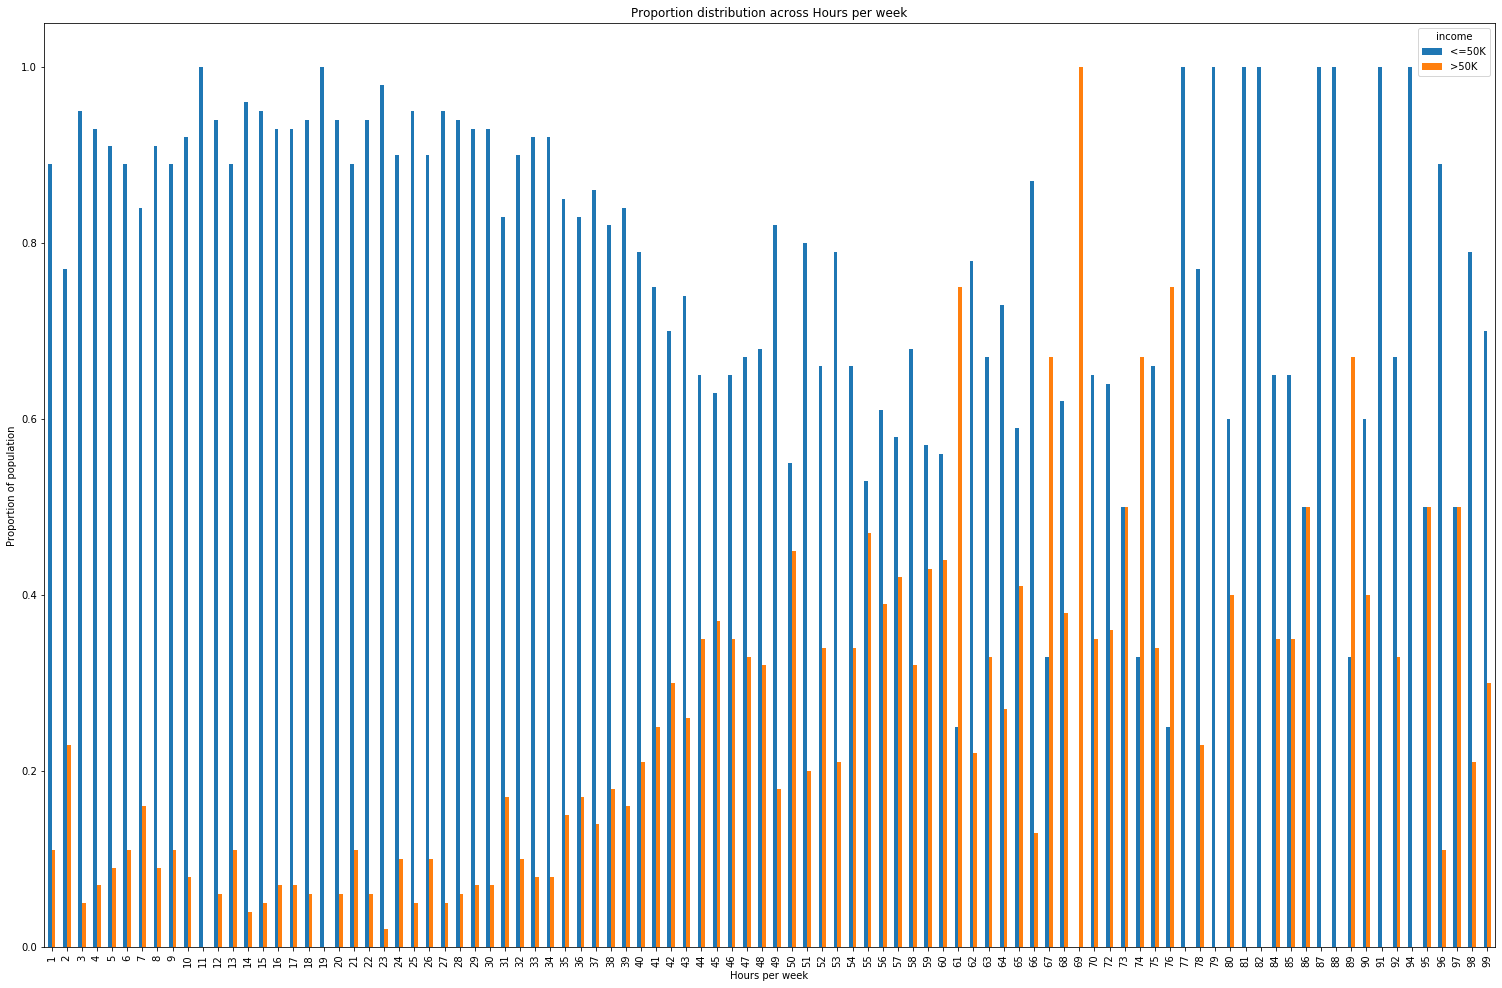

In [79]:
hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)

x = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (26,17))

x.set_xlabel('Hours per week')

x.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

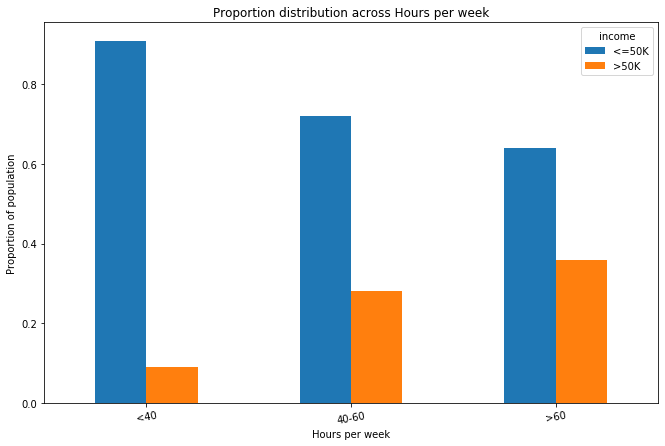

In [80]:
df['hour_worked'] = ['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in df['hours-per-week']]
df['hour_worked'] = df['hour_worked'].astype('category')
hours_per_week = round(pd.crosstab(df.hour_worked, df.income).div(pd.crosstab(df.hour_worked, df.income).apply(sum,1),0),2)
hours_per_week.sort_values(by = '>50K', inplace = True)
x = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (11,7), rot=10)
x.set_xlabel('Hours per week')
x.set_ylabel('Proportion of population')

more number of population are having good proportion distribution of income<= 50k

# project conclusion

In this project i have used many python libraries(numpy,pandas,matplotlib,seaborn,plotly) to get specific output  and hence we concluded that we have analyzed the dataset on the basis of gender,workclass and countries etc.

# numerical features

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
sclr = MinMaxScaler(feature_range=(-3,3))
sclr.fit_transform(df.age.values.reshape(-1, 1))

array([[-2.34246575],
       [-1.2739726 ],
       [-2.09589041],
       ...,
       [ 0.36986301],
       [-2.5890411 ],
       [-0.12328767]])

In [110]:
sclr = MinMaxScaler(feature_range=(-3,3))
sclr.fit_transform(df['educational-num'].values.reshape(-1, 1))

array([[-0.6],
       [ 0.2],
       [ 1.4],
       ...,
       [ 0.2],
       [ 0.2],
       [ 0.2]])

In [111]:
sclr = MinMaxScaler(feature_range=(-3,3))
sclr.fit_transform(df['hours-per-week'].values.reshape(-1, 1))

array([[-0.6122449 ],
       [ 0.        ],
       [-0.6122449 ],
       ...,
       [-0.6122449 ],
       [-1.83673469],
       [-0.6122449 ]])

In [112]:
sclr = MinMaxScaler(feature_range=(-3,3))
sclr.fit_transform(df['capital-gain'].values.reshape(-1, 1))

array([[-3.        ],
       [-3.        ],
       [-3.        ],
       ...,
       [-3.        ],
       [-3.        ],
       [-2.09855099]])

In [113]:
sclr = MinMaxScaler(feature_range=(-3,3))
sclr.fit_transform(df['capital-loss'].values.reshape(-1, 1))

array([[-3.],
       [-3.],
       [-3.],
       ...,
       [-3.],
       [-3.],
       [-3.]])

# categorical features

In [101]:
pd.get_dummies(df['income'], dummy_na=True)

,<=50K,>50K,NaN
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
48837,1,0,0
48838,0,1,0
48839,1,0,0
48840,1,0,0


In [102]:
pd.get_dummies(df['education'], dummy_na=True)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,NaN
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [103]:
pd.get_dummies(df['marital-status'], dummy_na=True)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,NaN
0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0
48838,0,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,1,0
48840,0,0,0,0,1,0,0,0


In [104]:
pd.get_dummies(df['occupation'], dummy_na=True)

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,NaN
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
48839,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
pd.get_dummies(df['relationship'], dummy_na=True)

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,NaN
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
48837,0,0,0,0,0,1,0
48838,1,0,0,0,0,0,0
48839,0,0,0,0,1,0,0
48840,0,0,0,1,0,0,0


In [106]:
pd.get_dummies(df['race'], dummy_na=True)

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,NaN
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
48837,0,0,0,0,1,0
48838,0,0,0,0,1,0
48839,0,0,0,0,1,0
48840,0,0,0,0,1,0


In [107]:
pd.get_dummies(df['gender'], dummy_na=True)

,Female,Male,NaN
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
48837,1,0,0
48838,0,1,0
48839,1,0,0
48840,0,1,0


In [108]:
pd.get_dummies(df['native-country'], dummy_na=True)

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
